In [50]:
import pandas as pd
import sqlite3
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

conn = sqlite3.connect('survey.db')
df = pd.read_sql('SELECT * FROM survey_data', conn)
print(df.shape)

(33668, 53)


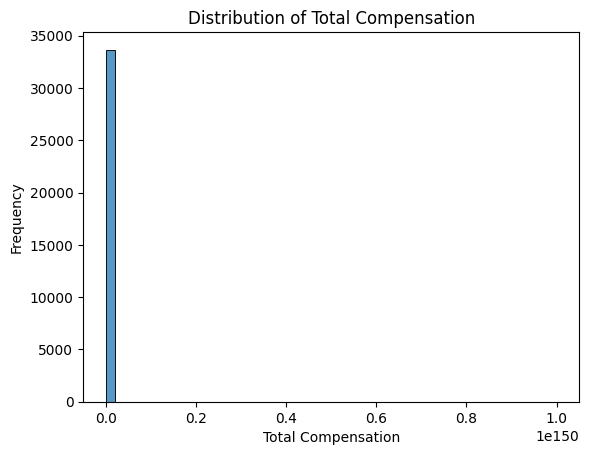

In [51]:
QUERY = """SELECT CompTotal FROM survey_data WHERE CompTotal IS NOT NULL"""

df = pd.read_sql_query(QUERY, conn)

sns.histplot(df['CompTotal'], bins=50)
plt.title('Distribution of Total Compensation')
plt.xlabel('Total Compensation')
plt.ylabel('Frequency')
plt.show()

Text(0.5, 0, 'Age (Numeric Approximation)')

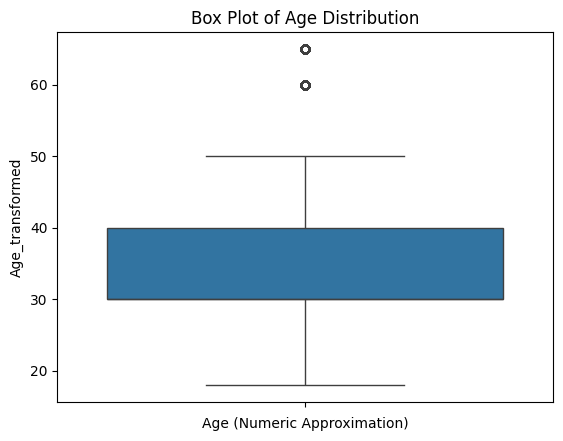

In [52]:
QUERY = """SELECT Age_transformed FROM survey_data WHERE Age_transformed IS NOT NULL"""
df = pd.read_sql_query(QUERY, conn)

sns.boxplot(df["Age_transformed"])
plt.title('Box Plot of Age Distribution')
plt.xlabel('Age (Numeric Approximation)')

<Axes: xlabel='Age_transformed', ylabel='WorkExp'>

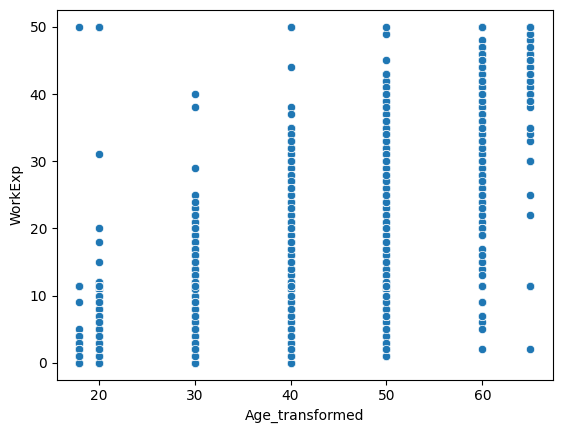

In [ ]:
QUERY = """SELECT Age_transformed, WorkExp FROM survey_data WHERE Age_transformed IS NOT NULL AND WorkExp IS NOT NULL"""

df = pd.read_sql_query(QUERY, conn)
sns.scatterplot(x=df["Age_transformed"], y=df["WorkExp"])

([0, 1, 2, 3, 4],
 [Text(0, 0, '30-60 minutes a day'),
  Text(1, 0, 'Less than 15 minutes a day'),
  Text(2, 0, '60-120 minutes a day'),
  Text(3, 0, '15-30 minutes a day'),
  Text(4, 0, 'Over 120 minutes a day')])

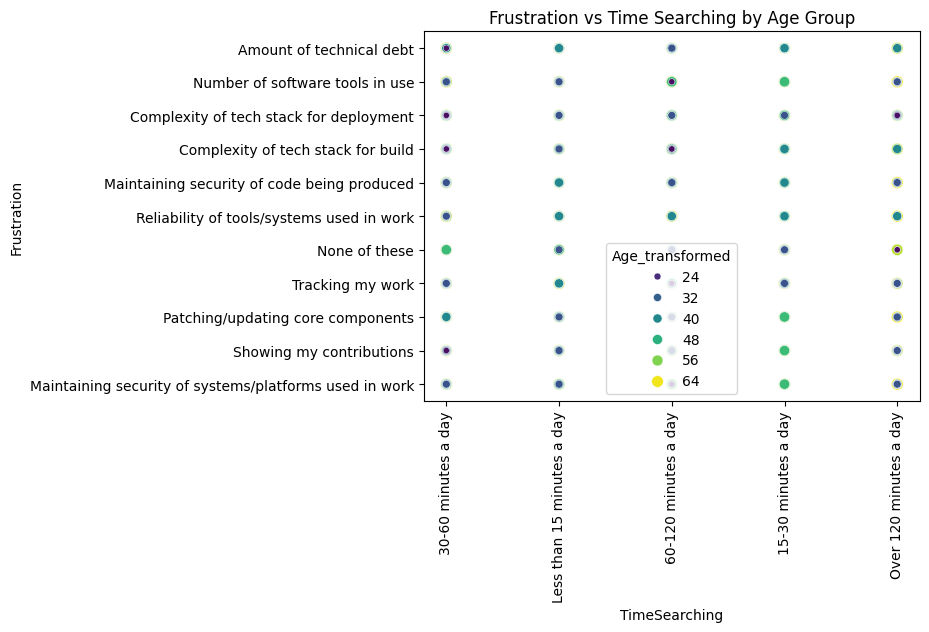

In [54]:
QUERY = """
SELECT TimeSearching, Frustration, Age_transformed
FROM survey_data
WHERE TimeSearching IS NOT NULL
  AND Frustration IS NOT NULL
  AND WorkExp IS NOT NULL
"""
df = pd.read_sql_query(QUERY, conn)

Frustration_type = df["Frustration"].str.split(";").explode().str.strip()

sns.scatterplot(x=df["TimeSearching"], y=Frustration_type,size=df["Age_transformed"],hue=df["Age_transformed"], palette="viridis")
plt.title("Frustration vs Time Searching by Age Group")
plt.xticks(rotation=90)

Text(0.5, 1.0, 'Top 5 Databases Respondents Want to Work With')

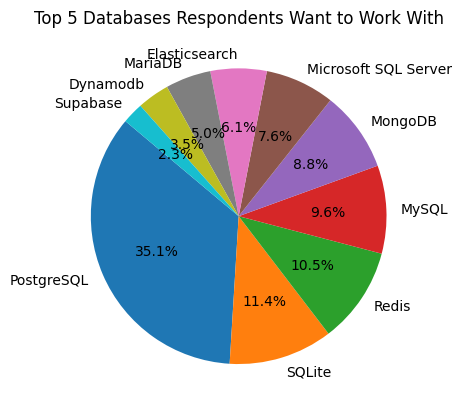

In [55]:
QUERY = """
SELECT DatabaseWantToWorkWith
FROM survey_data
WHERE DatabaseWantToWorkWith IS NOT NULL
"""
df = pd.read_sql_query(QUERY, conn)

Database = df["DatabaseWantToWorkWith"].str.split(";").explode().str.strip()
Top_Database = Database.value_counts().sort_values(ascending=False).head(10)

plt.pie(Top_Database.values, labels=Top_Database.index, autopct='%1.1f%%', startangle=140)
plt.title('Top 5 Databases Respondents Want to Work With')

                    TimeSearchingTransformed  TimeAnsweringTransformed
Age                                                                   
18-24 years old                    52.469189                 27.940541
25-34 years old                    48.752051                 33.306049
35-44 years old                    46.252274                 36.056673
45-54 years old                    44.474059                 34.337942
55-64 years old                    44.348081                 32.231793
65 years or older                  44.387755                 30.000000
Under 18 years old                 46.432584                 23.174157


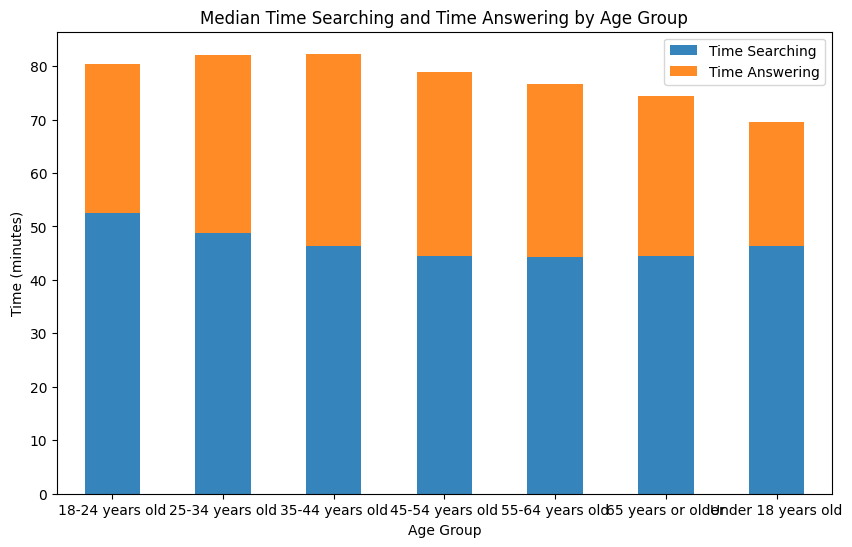

In [ ]:
QUERY = """
SELECT TimeSearchingTransformed , TimeAnsweringTransformed , Age FROM survey_data
WHERE TimeSearching IS NOT NULL 
    AND TimeAnswering IS NOT NULL 
"""
df = pd.read_sql_query(QUERY, conn)

grouped_data = df.groupby("Age").mean()
print(grouped_data)
grouped_data.plot(kind='bar', figsize=(10, 6), stacked=True,alpha=0.9)
plt.title('Avg Time Searching and Time Answering by Age Group')
plt.xticks(rotation=0)
plt.ylabel('Time (minutes)')
plt.xlabel('Age Group')
plt.legend( labels=['Time Searching', 'Time Answering'])

(array([-1.,  0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.]),
 [Text(-1.0, 0, 'Under 18 years old'),
  Text(0.0, 0, '18-24 years old'),
  Text(1.0, 0, '25-34 years old'),
  Text(2.0, 0, '35-44 years old'),
  Text(3.0, 0, '45-54 years old'),
  Text(4.0, 0, '55-64 years old'),
  Text(5.0, 0, '65 years or older'),
  Text(6.0, 0, 'Under 18 years old'),
  Text(7.0, 0, '')])

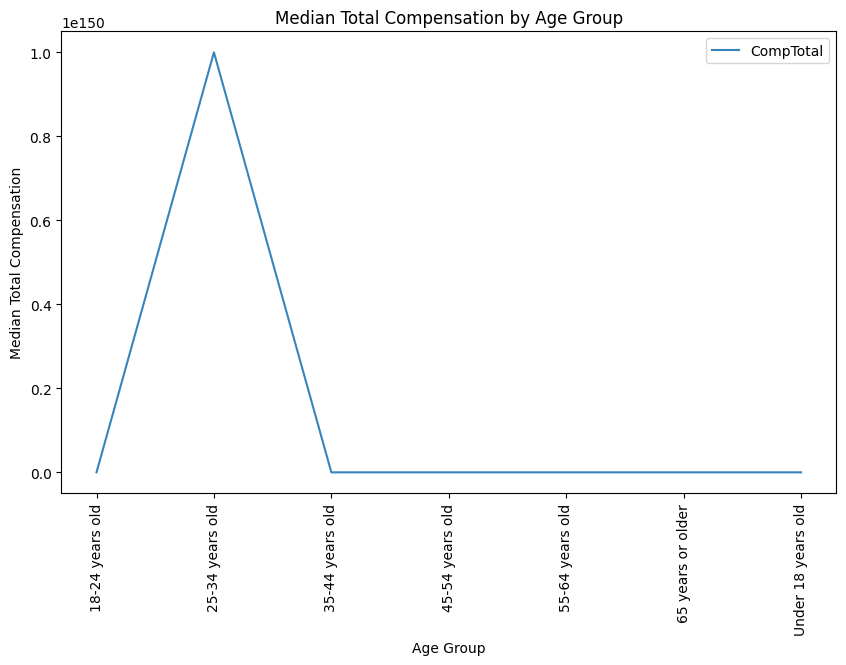

In [57]:
QUERY = """
SELECT CompTotal, Age FROM survey_data
WHERE CompTotal IS NOT NULL 
"""
df = pd.read_sql_query(QUERY, conn)

grouped_data = df.groupby("Age").sum().sort_index(ascending=True)


grouped_data.plot(kind='line', figsize=(10, 6), stacked=True, alpha=0.9)
plt.title('Median Total Compensation by Age Group')
plt.ylabel('Median Total Compensation')
plt.xlabel('Age Group')
plt.xticks(rotation=90)

Text(0, 0.5, 'Main Branch')

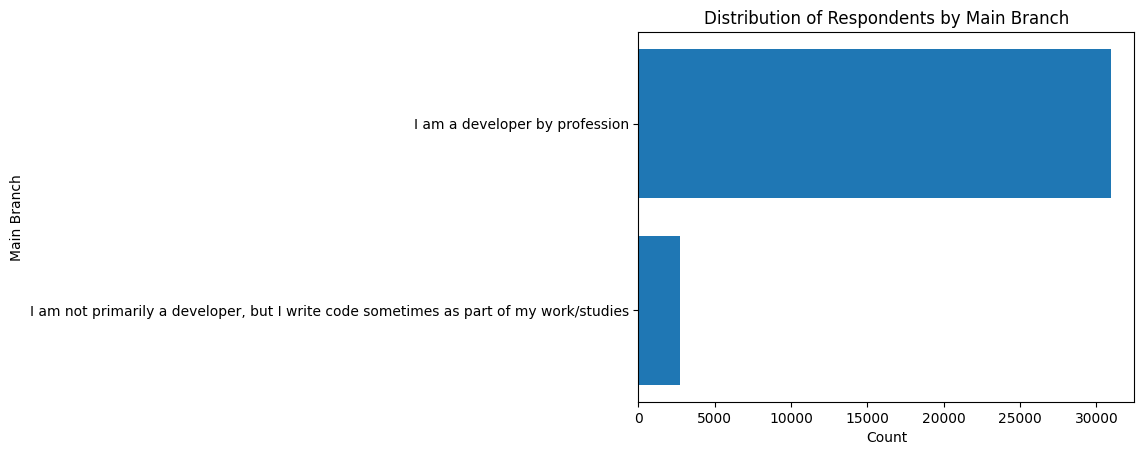

In [58]:
QUERY = """
SELECT MainBranch FROM survey_data
WHERE MainBranch IS NOT NULL 
"""
df = pd.read_sql_query(QUERY, conn)

MainBranch = df["MainBranch"].value_counts().sort_values(ascending=True)

plt.barh(y = MainBranch.index,width= MainBranch.values,)
plt.title('Distribution of Respondents by Main Branch')
plt.xlabel('Count')
plt.ylabel('Main Branch')

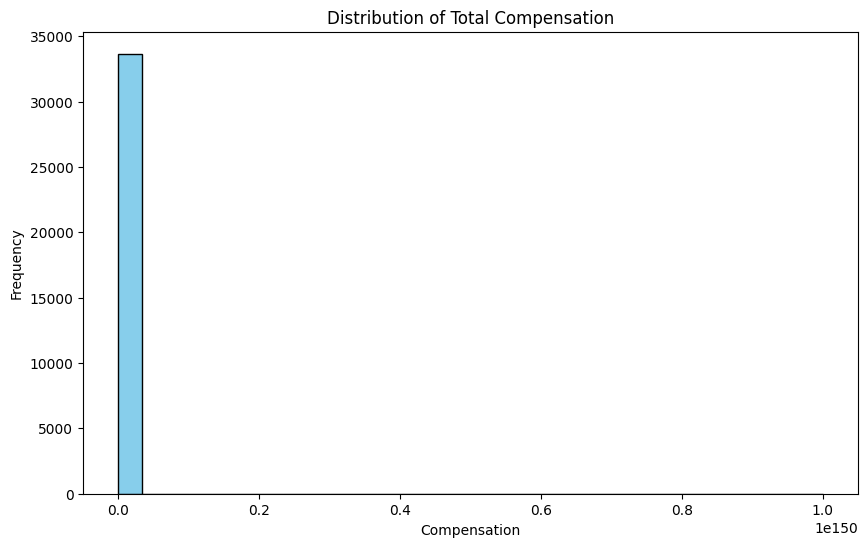

In [59]:
QUERY = "SELECT CompTotal FROM survey_data WHERE CompTotal IS NOT NULL"
df = pd.read_sql_query(QUERY, conn)

plt.figure(figsize=(10, 6))
plt.hist(df['CompTotal'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Total Compensation')
plt.xlabel('Compensation')
plt.ylabel('Frequency')
plt.show()

Text(0.5, 1.0, 'Mean Years of Professional Coding by Age')

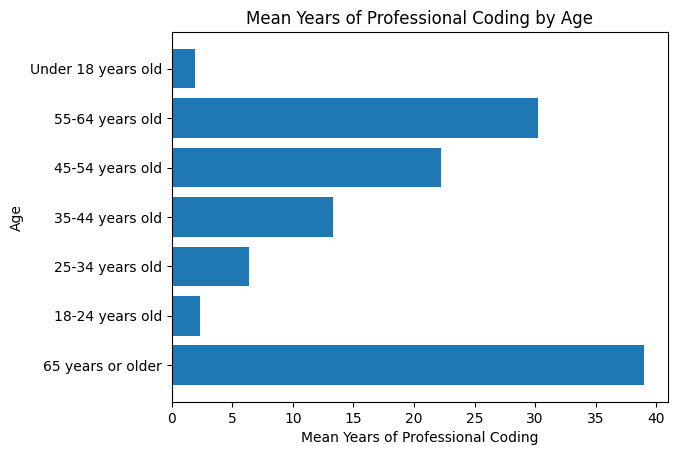

In [60]:
QUERY = """SELECT AVG(YearsCodePro) as YearsCodeProMean, Age FROM survey_data 
WHERE YearsCodePro IS NOT NULL 
AND Age IS NOT NULL 
GROUP BY Age 
ORDER BY 
    CASE Age
        WHEN 'Under 18 years' THEN 1
        WHEN '18-24 years' THEN 2
        WHEN '25-34 years' THEN 3
        WHEN '35-44 years' THEN 4
        WHEN '45-54 years' THEN 5
        WHEN '55-64 years' THEN 6
        WHEN '65 years or older' THEN 7
        ELSE 8
    END"""
df = pd.read_sql_query(QUERY, conn)

plt.barh(y = df["Age"], width = df["YearsCodeProMean"])
plt.xlabel("Mean Years of Professional Coding")
plt.ylabel("Age")
plt.title("Mean Years of Professional Coding by Age")


Text(0, 0.5, 'Age Group')

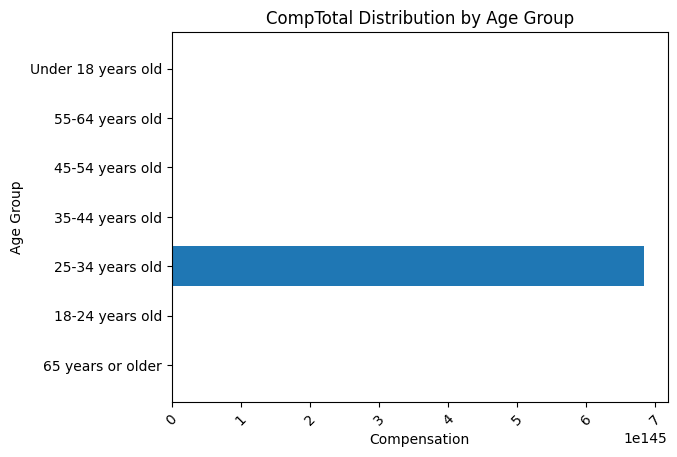

In [61]:
QUERY = """
SELECT Age, AVG(CompTotal) as CompTotal
FROM survey_data 
WHERE Age IS NOT NULL AND CompTotal IS NOT NULL
GROUP BY Age 
ORDER BY 
    CASE Age
        WHEN 'Under 18 years' THEN 1
        WHEN '18-24 years' THEN 2
        WHEN '25-34 years' THEN 3
        WHEN '35-44 years' THEN 4
        WHEN '45-54 years' THEN 5
        WHEN '55-64 years' THEN 6
        WHEN '65 years or older' THEN 7
        ELSE 8
    END
"""
df = pd.read_sql_query(QUERY, conn)


plt.barh(y=df["Age"],width=df["CompTotal"])
plt.xticks(rotation=45)
plt.title('CompTotal Distribution by Age Group')
plt.xlabel('Compensation')
plt.ylabel('Age Group')


Text(0, 0.5, 'Count')

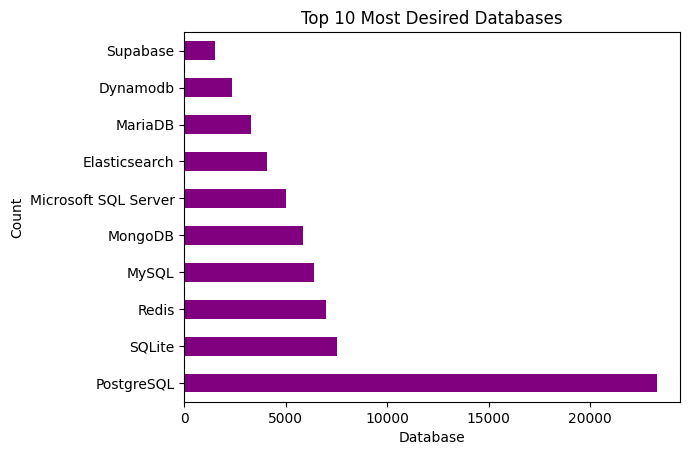

In [62]:
QUERY = """
SELECT DatabaseWantToWorkWith
FROM survey_data 
WHERE DatabaseWantToWorkWith IS NOT NULL
"""
df = pd.read_sql_query(QUERY, conn)

Databases = df["DatabaseWantToWorkWith"].str.split(";").explode().str.slice()

Databases = Databases.value_counts(ascending=False).head(10)

Databases.plot(kind="barh", color="Purple")
plt.title('Top 10 Most Desired Databases')
plt.xlabel('Database')
plt.ylabel('Count')


Text(0.5, 0, 'Count')

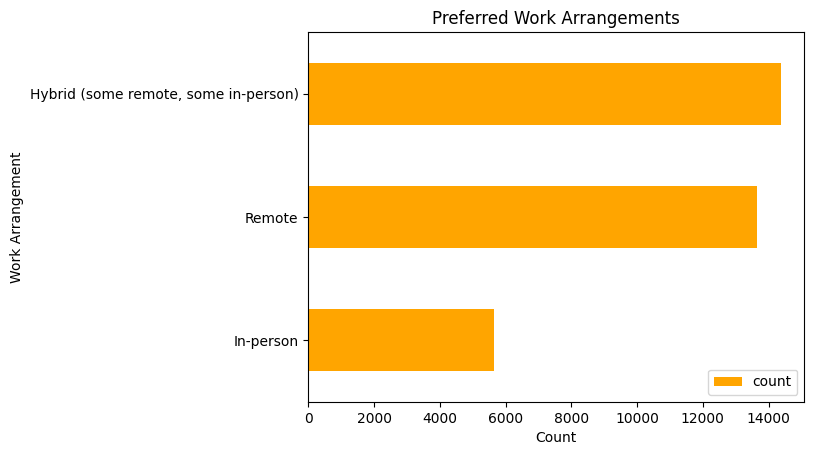

In [63]:
QUERY = """
SELECT RemoteWork, COUNT(*) as count
FROM survey_data 
WHERE RemoteWork IS NOT NULL
GROUP BY RemoteWork
ORDER BY count
"""
df = pd.read_sql_query(QUERY, conn)


df.set_index("RemoteWork", inplace=True)

df.plot(kind="barh", color="Orange")
plt.title('Preferred Work Arrangements')
plt.ylabel('Work Arrangement')
plt.xlabel('Count')

Text(0, 0.5, 'Experience Level')

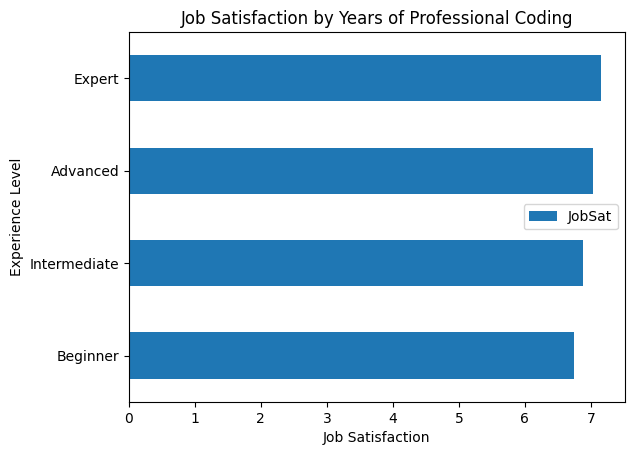

In [64]:
QUERY = """
SELECT  ExperienceLevelCoding, AVG(JobSat) as JobSat
FROM survey_data 
WHERE JobSat IS NOT NULL
AND ExperienceLevelCoding IS NOT NULL
GROUP BY ExperienceLevelCoding
ORDER BY JobSat
"""


df = pd.read_sql_query(QUERY, conn)

df.set_index("ExperienceLevelCoding",inplace=True)

df.plot(kind="barh")
plt.title('Job Satisfaction by Years of Professional Coding')
plt.xlabel('Job Satisfaction')
plt.ylabel('Experience Level')

{'whiskers': [<matplotlib.lines.Line2D at 0x256f7e50b50>,
 'caps': [<matplotlib.lines.Line2D at 0x256f7e62fd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x256f7e53510>],
 'medians': [<matplotlib.lines.Line2D at 0x256f7e60a90>],
 'fliers': [<matplotlib.lines.Line2D at 0x256f7e63390>],
 'means': []}

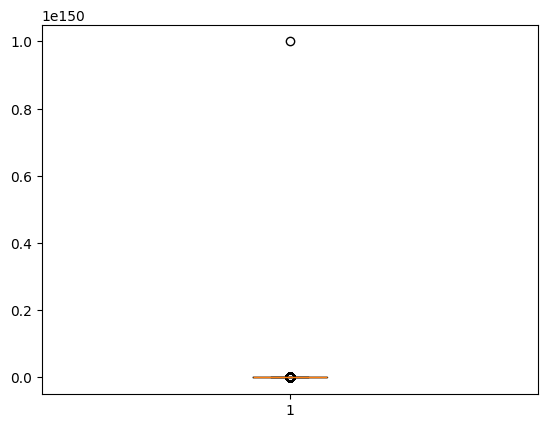

In [65]:
QUERY = """
SELECT  CompTotal FROM survey_data 
WHERE CompTotal IS NOT NULL

"""

df = pd.read_sql_query(QUERY, conn)

threshold = df.value_counts().idxmax()
plt.boxplot(df)

{'whiskers': [<matplotlib.lines.Line2D at 0x256f7f10890>,
 'caps': [<matplotlib.lines.Line2D at 0x256f7f121d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x256f7f12410>],
 'medians': [<matplotlib.lines.Line2D at 0x256f7f20410>],
 'fliers': [<matplotlib.lines.Line2D at 0x256f7f237d0>],
 'means': []}

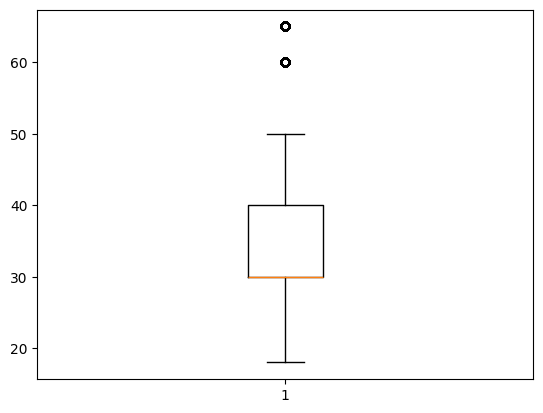

In [66]:
QUERY = """
SELECT  Age_transformed FROM survey_data 
WHERE Age_transformed IS NOT NULL
"""
df = pd.read_sql_query(QUERY, conn)

plt.boxplot(df)

Text(0, 0.5, 'Compensation')

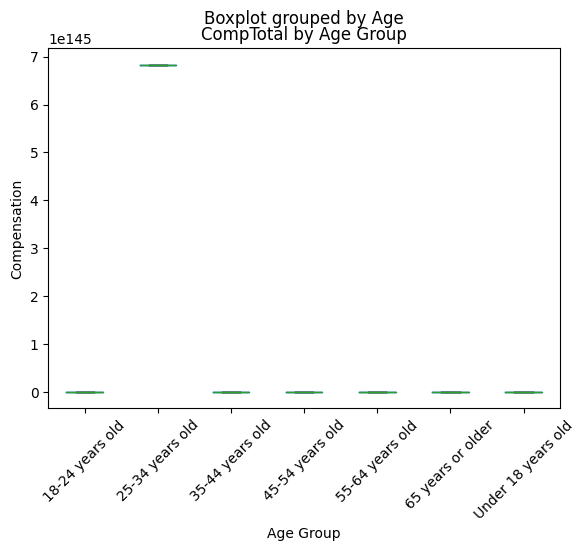

In [67]:
QUERY = """
SELECT  AVG(CompTotal) as comptotal, Age
FROM survey_data 
WHERE CompTotal IS NOT NULL
AND Age IS NOT NULL
GROUP BY Age
"""

df = pd.read_sql_query(QUERY,conn)

df.boxplot(column="comptotal" , by="Age", rot=45)
plt.grid(False)
plt.title('CompTotal by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Compensation')


(array([1, 2, 3, 4, 5]),
 [Text(1, 0, 'Developer, back-end'),
  Text(2, 0, 'Developer, desktop or enterprise applications'),
  Text(3, 0, 'Developer, front-end'),
  Text(4, 0, 'Developer, full-stack'),
  Text(5, 0, 'Developer, mobile')])

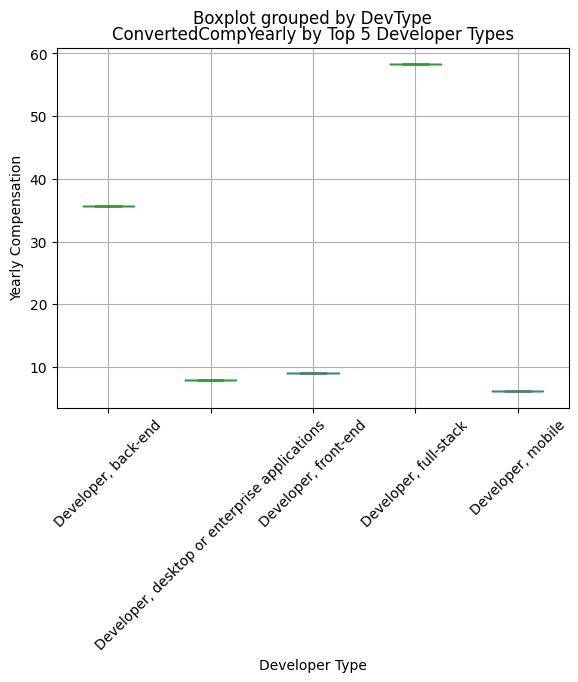

In [68]:
QUERY = """
SELECT DevType, COUNT(Country) as count ,SUM(ConvertedCompYearly) as ConvertedCompYearly FROM survey_data 
WHERE DevType IS NOT NULL
AND ConvertedCompYearly IS NOT NULL
GROUP BY DevType
ORDER BY count DESC LIMIT 5
"""

df = pd.read_sql_query(QUERY,conn)

df.boxplot(column="ConvertedCompYearly" , by="DevType")
plt.title('ConvertedCompYearly by Top 5 Developer Types')
plt.xlabel('Developer Type')
plt.ylabel('Yearly Compensation')
plt.xticks(rotation=45)

Text(0, 0.5, 'Total Compensation')

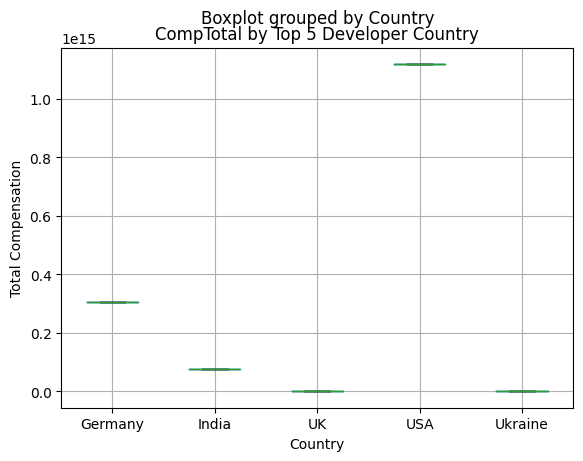

In [69]:
QUERY = """
SELECT Country, COUNT(Country) as count ,SUM(CompTotal) as CompTotal FROM survey_data 
WHERE Country IS NOT NULL
AND CompTotal IS NOT NULL
GROUP BY Country
ORDER BY count DESC LIMIT 5
"""

df = pd.read_sql_query(QUERY,conn)

df.boxplot(column="CompTotal" , by="Country")
plt.title('CompTotal by Top 5 Developer Country')
plt.xlabel('Country')
plt.ylabel('Total Compensation')

In [70]:
df = pd.read_sql('SELECT * FROM survey_data', conn)

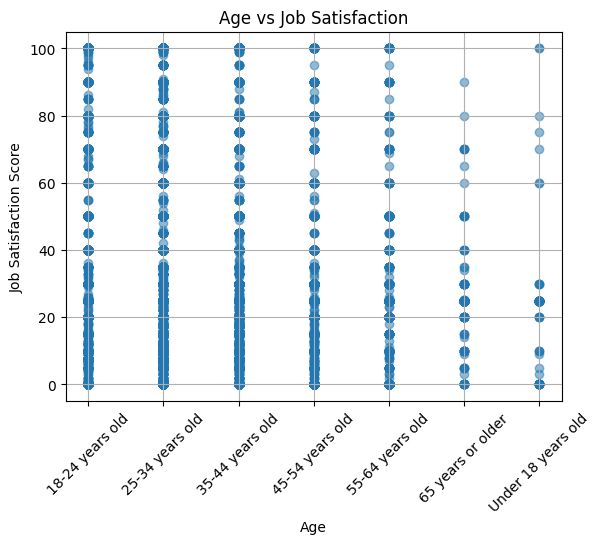

In [71]:
plt.scatter(df['Age'], df['JobSatPoints_6'], alpha=0.5)
plt.title('Age vs Job Satisfaction')
plt.xlabel('Age')
plt.ylabel('Job Satisfaction Score')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

Text(0, 0.5, 'Job Satisfaction Score')

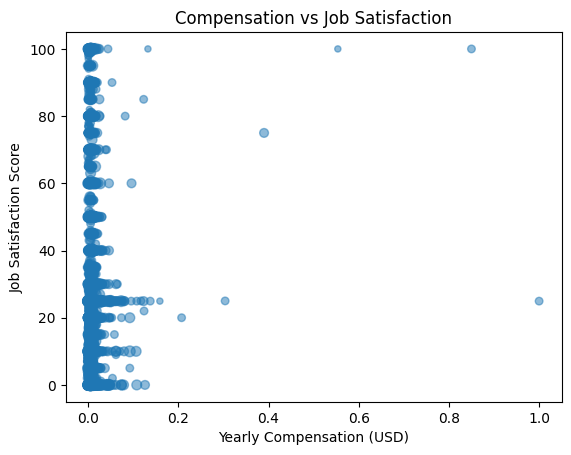

In [72]:
plt.scatter(df['ConvertedCompYearly'], df['JobSatPoints_6'],s=df["Age_transformed"],alpha=0.5)
plt.title('Compensation vs Job Satisfaction')
plt.xlabel('Yearly Compensation (USD)')
plt.ylabel('Job Satisfaction Score')

Text(0, 0.5, 'Job Satisfaction Score')

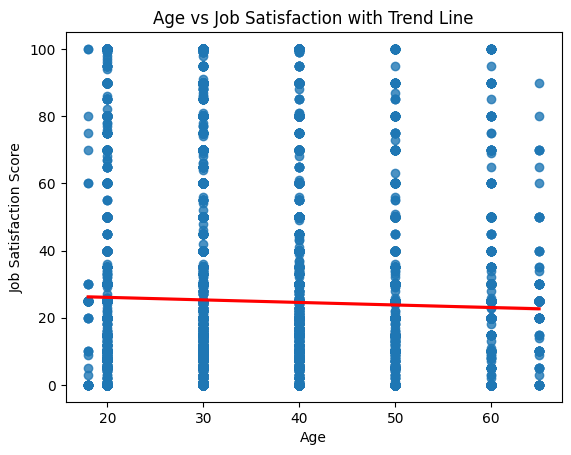

In [73]:
sns.regplot(x= df['Age_transformed'],y= df['JobSatPoints_6'],line_kws={"color":"red"})
plt.title('Age vs Job Satisfaction with Trend Line')
plt.xlabel('Age')
plt.ylabel('Job Satisfaction Score')

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Bash/Shell (all shells)'),
  Text(1, 0, 'C#'),
  Text(2, 0, 'C++'),
  Text(3, 0, 'HTML/CSS'),
  Text(4, 0, 'Java'),
  Text(5, 0, 'JavaScript'),
  Text(6, 0, 'PHP'),
  Text(7, 0, 'Python'),
  Text(8, 0, 'SQL'),
  Text(9, 0, 'TypeScript')])

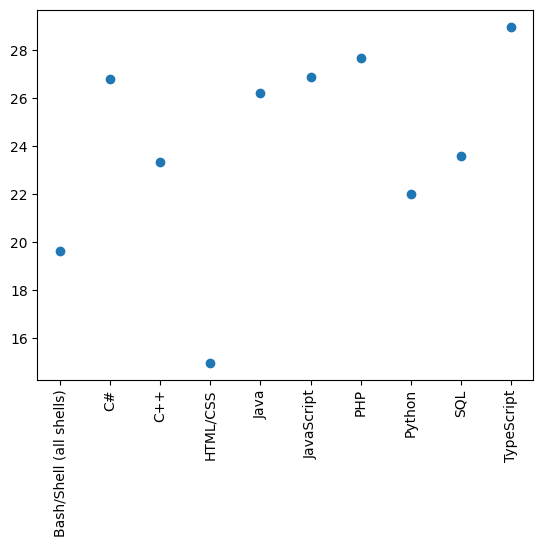

In [ ]:
top_language = df["LanguageHaveWorkedWith"].str.split(";").explode().str.strip().value_counts().head(10).index

language_df = df.assign(language_worked_with = df["LanguageHaveWorkedWith"].str.split(";").explode("LanguageHaveWorkedWith"))

language_df = language_df[language_df["LanguageHaveWorkedWith"].isin(top_language)]

language_job = language_df.groupby("LanguageHaveWorkedWith")["JobSatPoints_6"].mean()

plt.scatter(x =language_job.index, y = language_job.values )
plt.xticks(rotation=90)

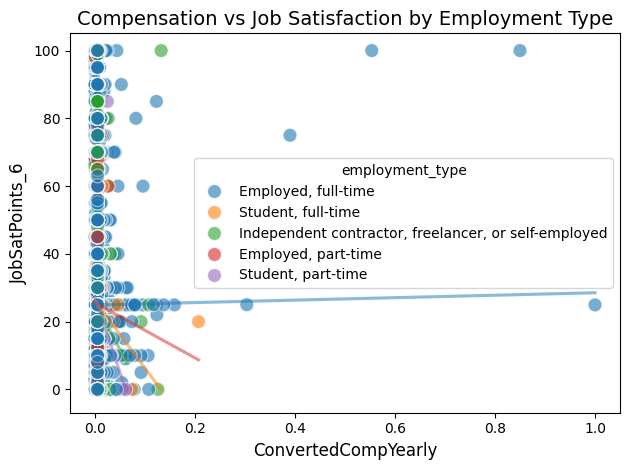

In [75]:
employment  = df["Employment"].str.split(";").explode().str.strip()
top_employment  = employment.value_counts().head(5).index

# assign makes a caopy od the original dataframe and adds the splited column in it 
subset = df.assign(employment_type = df["Employment"].str.split(";").explode("Employment"))
subset = subset[subset["employment_type"].isin(top_employment)]

sns.scatterplot(x=subset["ConvertedCompYearly"], y= subset["JobSatPoints_6"], hue=subset["employment_type"],s=100,alpha=0.6)
plt.title('Compensation vs Job Satisfaction by Employment Type', fontsize=14)
plt.xlabel('Yearly Compensation (USD)', fontsize=12)
plt.ylabel('Job Satisfaction Score', fontsize=12)

for emp_type in top_employment:
    emp_data = subset[subset['employment_type'] == emp_type]
    sns.regplot(
        x=emp_data['ConvertedCompYearly'],
        y=emp_data['JobSatPoints_6'],
        scatter=False,
        ci=False,
        line_kws={'linestyle':'-', 'alpha':0.5}
    )

plt.tight_layout()


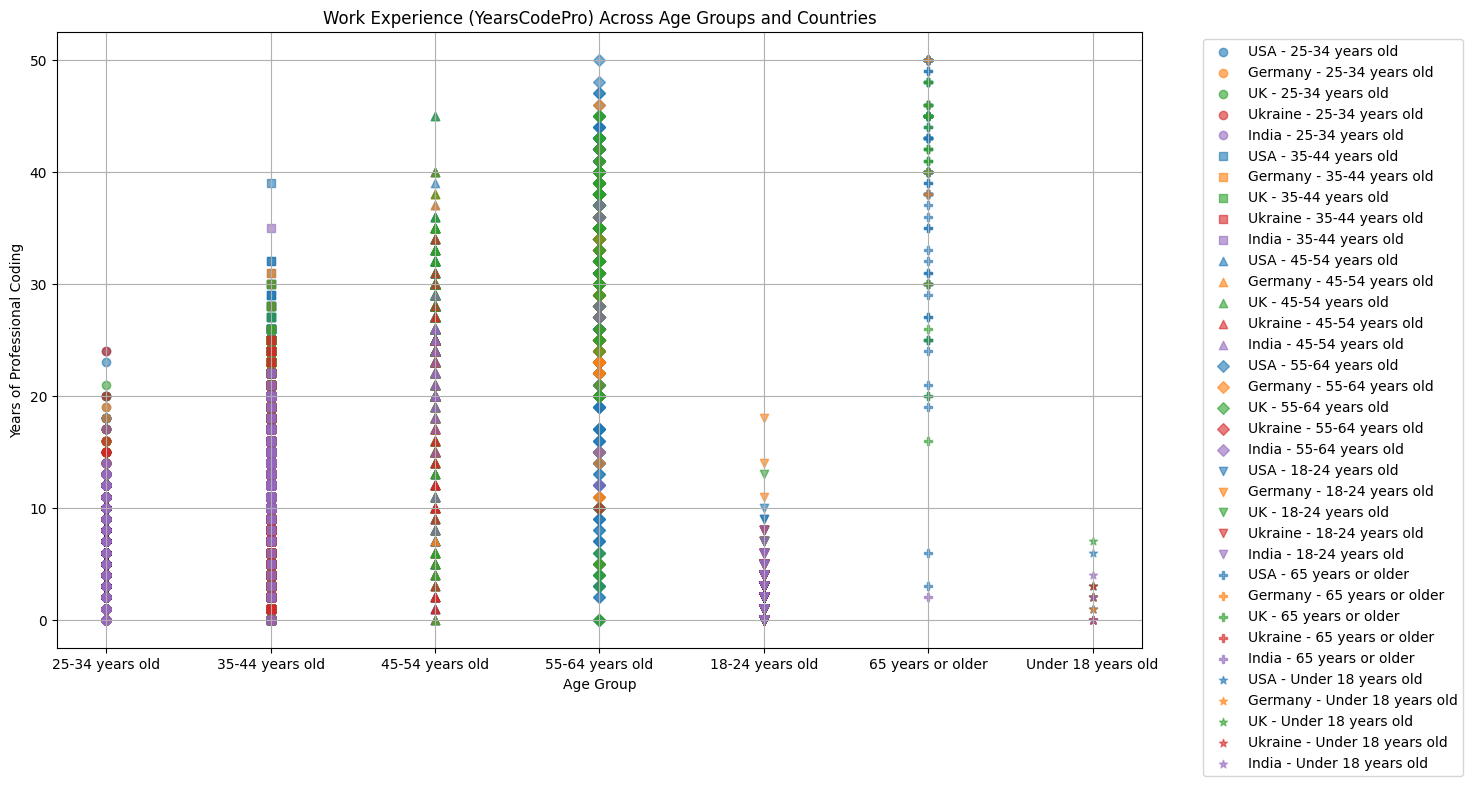

In [76]:
top_countries = df["Country"].value_counts(ascending=False).head(5).index
df_clean = df[df["Country"].isin(top_countries)][["YearsCodePro", "Age", "Country"]]
age_groups = df_clean["Age"].unique()
markers = ['o', 's', '^', 'D', 'v', 'P', '*']  
country_colors = dict(zip(top_countries, sns.color_palette("tab10", len(top_countries))))
    
plt.figure(figsize=(14, 8))
for age_i, age_group in enumerate(age_groups):
    for country in top_countries:
        subset = df_clean[(df_clean["Country"] == country) & (df_clean["Age"] == age_group)]
        plt.scatter(
            x=subset["Age"], 
            y=subset["YearsCodePro"], 
            color=country_colors[country], 
            marker=markers[age_i % len(markers)], 
            label=f"{country} - {age_group}",
            alpha=0.6
        )

plt.title('Work Experience (YearsCodePro) Across Age Groups and Countries')
plt.xlabel('Age Group')
plt.ylabel('Years of Professional Coding')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)

([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, '18-24 years old'),
  Text(1, 0, '25-34 years old'),
  Text(2, 0, '35-44 years old'),
  Text(3, 0, '45-54 years old'),
  Text(4, 0, '55-64 years old'),
  Text(5, 0, '65 years or older'),
  Text(6, 0, 'Under 18 years old')])

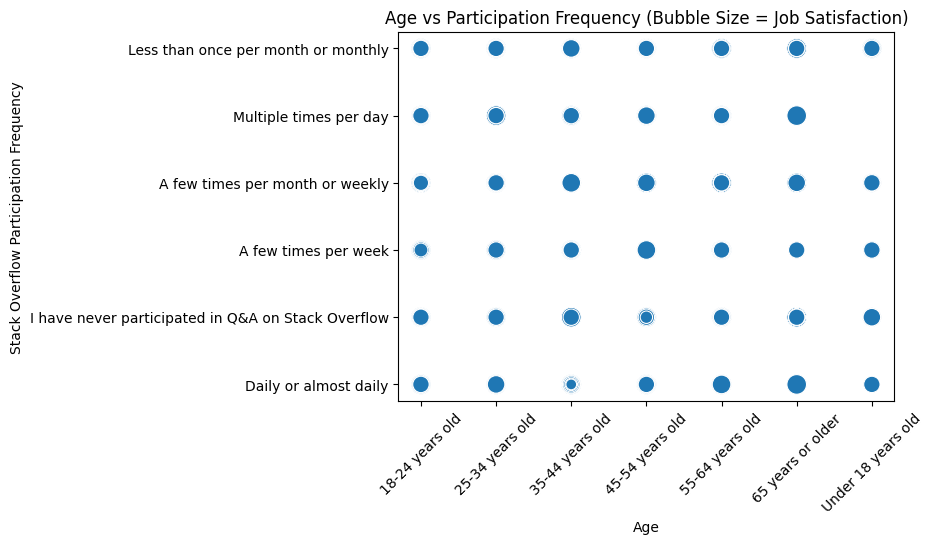

In [77]:
sns.scatterplot(x= df["Age"],y=df["SOPartFreq"],s=df["JobSat"]*20)
plt.title("Age vs Participation Frequency (Bubble Size = Job Satisfaction)")
plt.xlabel("Age")
plt.ylabel("Stack Overflow Participation Frequency")
plt.xticks(rotation=45)

([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, '18-24 years old'),
  Text(1, 0, '25-34 years old'),
  Text(2, 0, '35-44 years old'),
  Text(3, 0, '45-54 years old'),
  Text(4, 0, '55-64 years old'),
  Text(5, 0, '65 years or older'),
  Text(6, 0, 'Under 18 years old')])

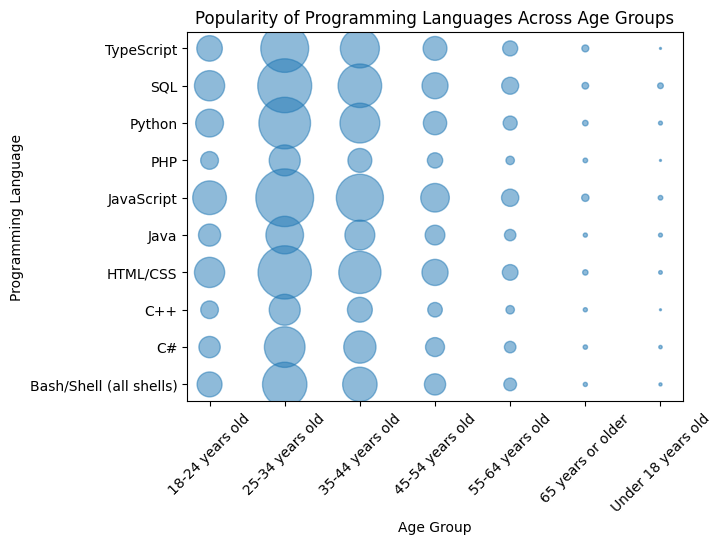

In [ ]:
language = df["LanguageHaveWorkedWith"].str.split(";").explode().str.strip().value_counts(ascending=False).head(10).index
df_clean = df.assign(language_workedc_with = df["LanguageHaveWorkedWith"].str.split(";").explode("LanguageHaveWorkedWith"))
df_clean = df_clean[df_clean["language_workedc_with"].isin(language)]

df_clean = df_clean.groupby(["Age","language_workedc_with"])["language_workedc_with"].size().reset_index(name="Frequency")

plt.scatter(
    x= df_clean["Age"],
    y=df_clean["language_workedc_with"],
    s=df_clean["Frequency"],
    alpha=0.5
)
plt.title("Popularity of Programming Languages Across Age Groups")
plt.xlabel("Age Group")
plt.ylabel("Programming Language")
plt.xticks(rotation=45)

(array([-2.,  0.,  2.,  4.,  6.,  8., 10., 12.]),
 [Text(-2.0, 0, '−2'),
  Text(0.0, 0, '0'),
  Text(2.0, 0, '2'),
  Text(4.0, 0, '4'),
  Text(6.0, 0, '6'),
  Text(8.0, 0, '8'),
  Text(10.0, 0, '10'),
  Text(12.0, 0, '12')])

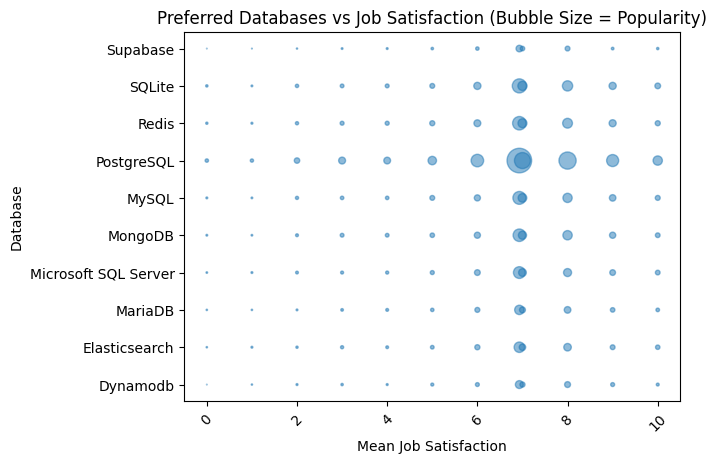

In [ ]:
language = df["DatabaseWantToWorkWith"].str.split(";").explode().str.strip().value_counts(ascending=False).head(10).index
df_clean = df.assign(Database_Want_To_Work_With = df["DatabaseWantToWorkWith"].str.split(";").explode("DatabaseWantToWorkWith"))
df_clean = df_clean[df_clean["Database_Want_To_Work_With"].isin(language)]

df_clean = df_clean.groupby(["JobSat","Database_Want_To_Work_With"])["Database_Want_To_Work_With"].size().reset_index(name="Frequency")

plt.scatter(
    x= df_clean["JobSat"],
    y=df_clean["Database_Want_To_Work_With"],
    s=df_clean["Frequency"]/10,
    alpha=0.5
)
plt.title('Preferred Databases vs Job Satisfaction (Bubble Size = Popularity)')
plt.xlabel('Mean Job Satisfaction')
plt.ylabel('Database')
plt.xticks(rotation=45)

([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, '18-24 years old'),
  Text(1, 0, '25-34 years old'),
  Text(2, 0, '35-44 years old'),
  Text(3, 0, '45-54 years old'),
  Text(4, 0, '55-64 years old'),
  Text(5, 0, '65 years or older'),
  Text(6, 0, 'Under 18 years old')])

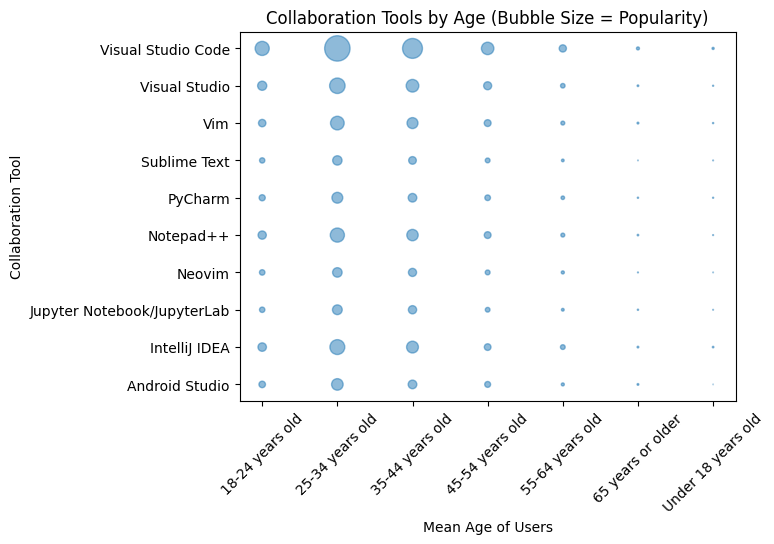

In [ ]:
language = df["NEWCollabToolsHaveWorkedWith"].str.split(";").explode().str.strip().value_counts(ascending=False).head(10).index
df_clean = df.assign(Collab_Tool_wroked_with = df["NEWCollabToolsHaveWorkedWith"].str.split(";").explode("NEWCollabToolsHaveWorkedWith"))
df_clean = df_clean[df_clean["Collab_Tool_wroked_with"].isin(language)]

df_clean = df_clean.groupby(["Age","Collab_Tool_wroked_with"])["Collab_Tool_wroked_with"].count().reset_index(name="Frequency")

plt.scatter(
    x= df_clean["Age"],
    y=df_clean["Collab_Tool_wroked_with"],
    s=df_clean["Frequency"]/10,
    alpha=0.5
)
plt.title('Collaboration Tools by Age (Bubble Size = Popularity)')
plt.xlabel('Mean Age of Users')
plt.ylabel('Collaboration Tool')
plt.xticks(rotation=45)

(array([-2.,  0.,  2.,  4.,  6.,  8., 10., 12.]),
 [Text(-2.0, 0, '−2'),
  Text(0.0, 0, '0'),
  Text(2.0, 0, '2'),
  Text(4.0, 0, '4'),
  Text(6.0, 0, '6'),
  Text(8.0, 0, '8'),
  Text(10.0, 0, '10'),
  Text(12.0, 0, '12')])

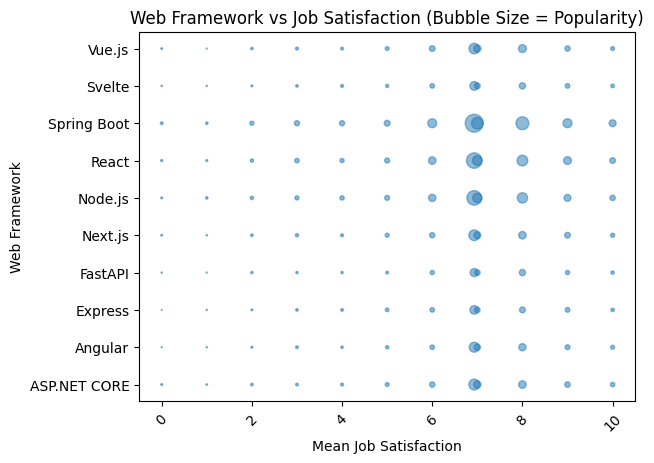

In [81]:
language = df["WebframeWantToWorkWith"].str.split(";").explode().str.strip().value_counts(ascending=False).head(10).index
df_clean = df.assign(Web_Frame_Want_To_Work_With = df["WebframeWantToWorkWith"].str.split(";").explode("WebframeWantToWorkWith"))
df_clean = df_clean[df_clean["Web_Frame_Want_To_Work_With"].isin(language)]

df_clean = df_clean.groupby(["JobSat","Web_Frame_Want_To_Work_With"])["Web_Frame_Want_To_Work_With"].count().reset_index(name="Frequency")

plt.scatter(
    x= df_clean["JobSat"],
    y=df_clean["Web_Frame_Want_To_Work_With"],
    s=df_clean["Frequency"]/10,
    alpha=0.5
)
plt.title('Web Framework vs Job Satisfaction (Bubble Size = Popularity)')
plt.xlabel('Mean Job Satisfaction')
plt.ylabel('Web Framework')
plt.xticks(rotation=45)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Brazil'),
  Text(1, 0, 'Canada'),
  Text(2, 0, 'France'),
  Text(3, 0, 'Germany'),
  Text(4, 0, 'India'),
  Text(5, 0, 'Netherlands'),
  Text(6, 0, 'Poland'),
  Text(7, 0, 'UK'),
  Text(8, 0, 'USA'),
  Text(9, 0, 'Ukraine')])

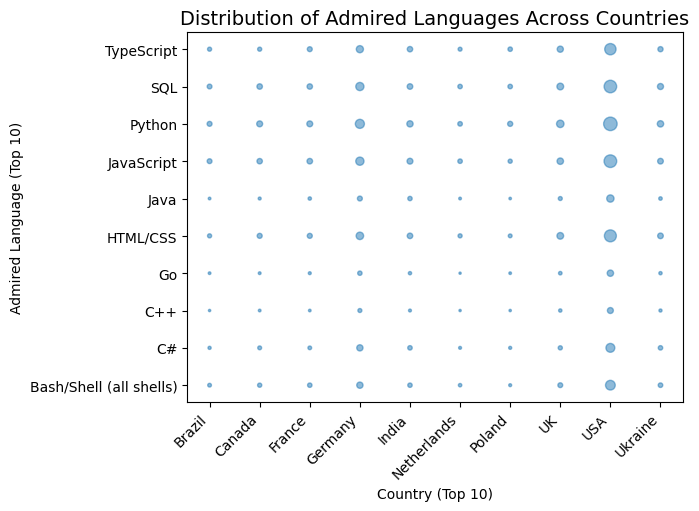

In [82]:
country = df["Country"].str.split(";").explode().str.strip().value_counts(ascending=False).head(10).index
language = df["LanguageAdmired"].str.split(";").explode().str.strip().value_counts(ascending=False).head(10).index
df_clean = df.assign(language_admired = df["LanguageAdmired"].str.split(";").explode("LanguageAdmired"))
df_clean = df_clean[df_clean["Country"].isin(country) & df_clean["language_admired"].isin(language)]

df_clean = df_clean.groupby(["Country","language_admired"])["language_admired"].count().reset_index(name="Frequency")

plt.scatter(
    x= df_clean["Country"],
    y=df_clean["language_admired"],
    s=df_clean["Frequency"]/10,
    alpha=0.5
)
plt.title('Web Framework vs Job Satisfaction (Bubble Size = Popularity)')
plt.xlabel('Mean Job Satisfaction')
plt.ylabel('Web Framework')
plt.xticks(rotation=45)
plt.title("Distribution of Admired Languages Across Countries", fontsize=14)
plt.xlabel("Country (Top 10)")
plt.ylabel("Admired Language (Top 10)")
plt.xticks(rotation=45, ha="right")

Text(0.5, 1.0, 'Top 5 Developer Roles')

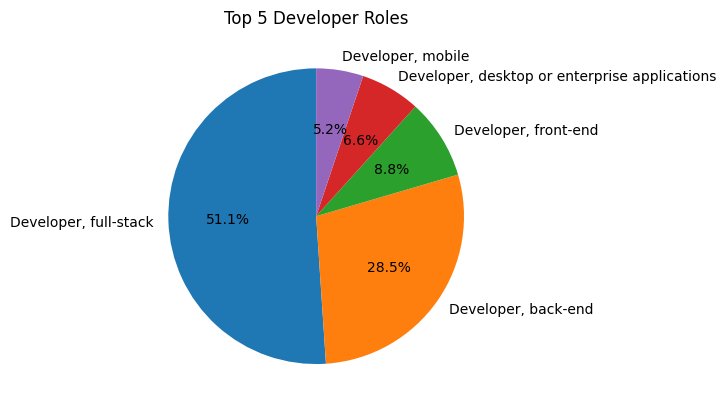

In [83]:
dev_types =df["DevType"].str.split(";").explode().str.strip()
dev_types = dev_types.value_counts().head(5)
plt.pie(dev_types, labels=dev_types.index, autopct='%1.1f%%', startangle=90)
plt.title('Top 5 Developer Roles')

Text(0.5, 1.0, 'Top 5 Most Desired Web Frameworks')

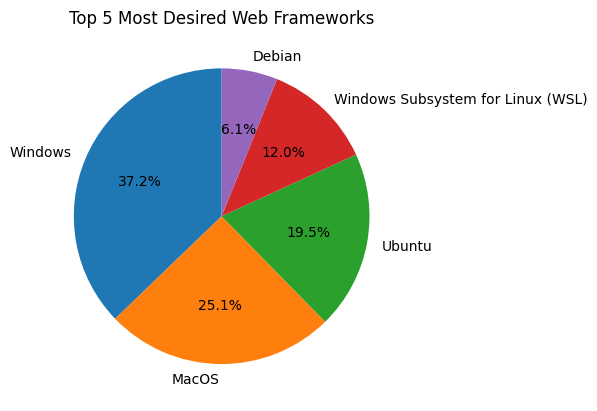

In [84]:
dev_types =df["OpSysProfessional use"].str.split(";").explode().str.strip()
dev_types = dev_types.value_counts().head(5)
plt.pie(dev_types, labels=dev_types.index, autopct='%1.1f%%', startangle=90)
plt.title('Top 5 Most Desired Web Frameworks')

Text(0.5, 1.0, 'Top 5 Most Desired Embedded Technologies')

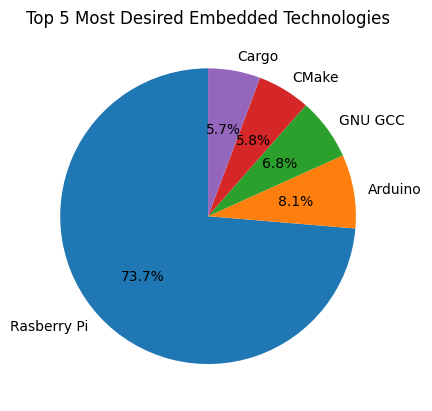

In [85]:
dev_types =df["EmbeddedWantToWorkWith"].str.split(";").explode().str.strip()
dev_types = dev_types.value_counts().head(5)
plt.pie(dev_types, labels=dev_types.index, autopct='%1.1f%%', startangle=90)
plt.title('Top 5 Most Desired Embedded Technologies')

<Axes: xlabel='Age'>

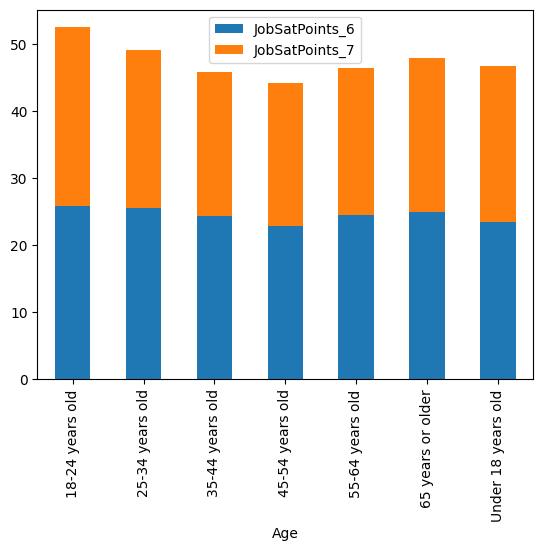

In [86]:
job_sat_df = df[["JobSatPoints_6","JobSatPoints_7","Age"]]
job_sat_df = job_sat_df.groupby("Age")[["JobSatPoints_6","JobSatPoints_7"]].mean()

job_sat_df.plot(kind="bar",stacked=True)

Text(0, 0.5, 'Mean Satisfaction Score')

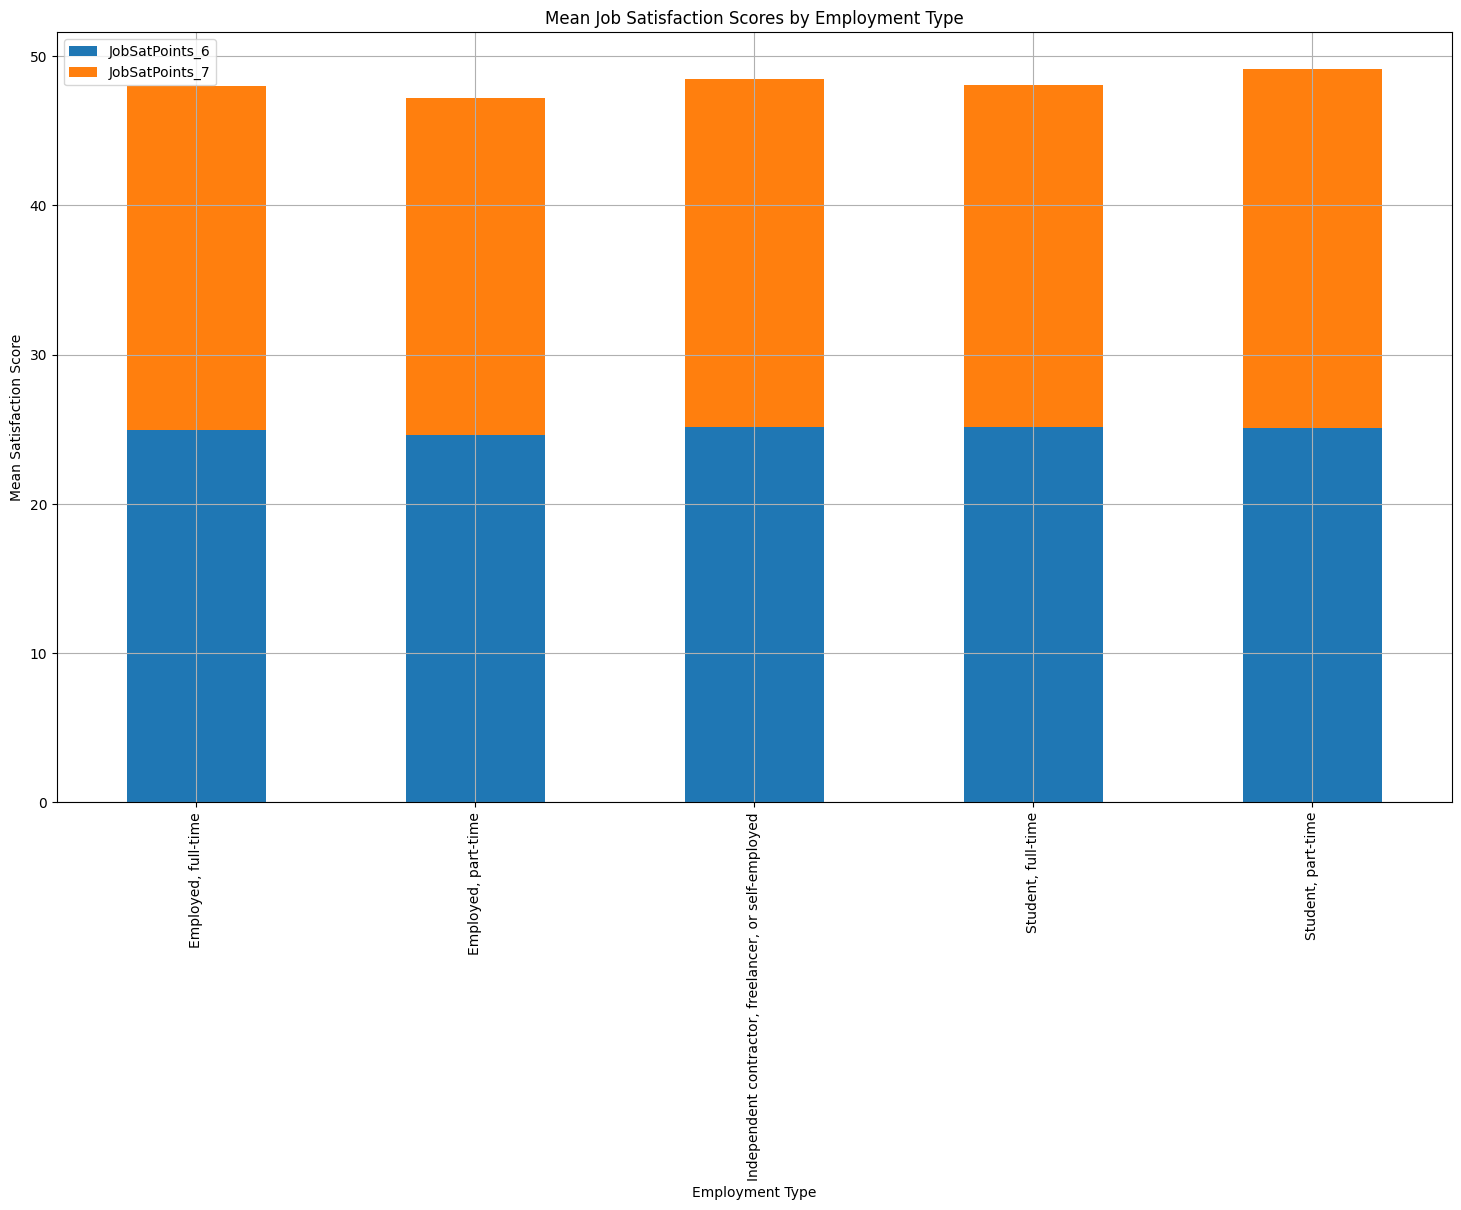

In [87]:
df_clean = df[["Employment","JobSatPoints_6","JobSatPoints_7"]]
top_employment = df_clean["Employment"].str.split(";").explode().str.strip().value_counts().head(5).index

employment_df = df_clean.assign(employment_type = df_clean["Employment"].str.split(";").explode("Employment"))
employment_df = employment_df[employment_df["employment_type"].isin(top_employment)]

employment_df = employment_df.groupby("employment_type")[["JobSatPoints_6","JobSatPoints_7"]].mean()

employment_df.plot(kind="bar",stacked=True,figsize=(18,10))
plt.grid(True)
plt.title('Mean Job Satisfaction Scores by Employment Type')
plt.xlabel('Employment Type')
plt.ylabel('Mean Satisfaction Score')

Text(0.5, 0, 'Database')

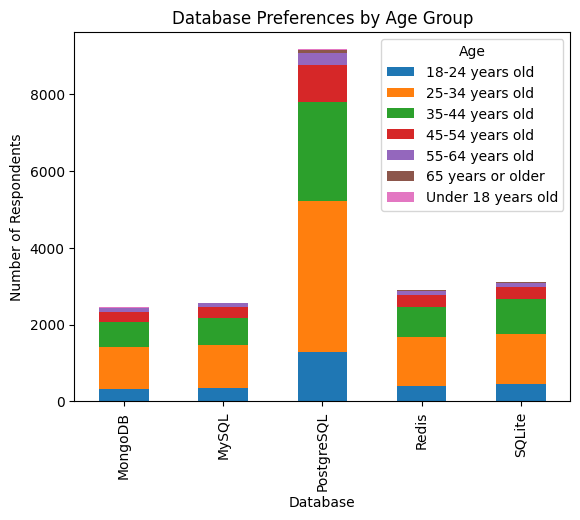

In [88]:
df_clean = df[["DatabaseWantToWorkWith","Age"]]
top_employment = df_clean["DatabaseWantToWorkWith"].str.split(";").explode().str.strip().value_counts().head(5).index

employment_df = df_clean.assign(database_type = df_clean["DatabaseWantToWorkWith"].str.split(";").explode("DatabaseWantToWorkWith"))
employment_df = employment_df[employment_df["database_type"].isin(top_employment)]

employment_df = employment_df.groupby(["database_type","Age"]).size().unstack()
employment_df.plot(kind="bar",stacked=True)
plt.title("Database Preferences by Age Group")
plt.ylabel("Number of Respondents")
plt.xlabel("Database")

Text(0, 0.5, 'Count of Respondents')

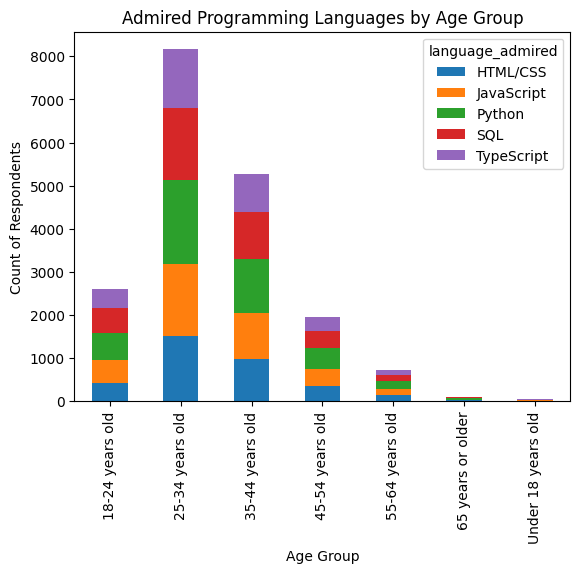

In [89]:
df_clean = df[["LanguageAdmired","Age"]]
top_employment = df_clean["LanguageAdmired"].str.split(";").explode().str.strip().value_counts().head(5).index

employment_df = df_clean.assign(language_admired = df_clean["LanguageAdmired"].str.split(";").explode("LanguageAdmired"))
employment_df = employment_df[employment_df["language_admired"].isin(top_employment)]

employment_df = employment_df.groupby(["Age","language_admired"]).size().unstack()
employment_df.plot(kind="bar",stacked=True)
plt.title('Admired Programming Languages by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count of Respondents')

Text(0.5, 0, 'Employment Type')

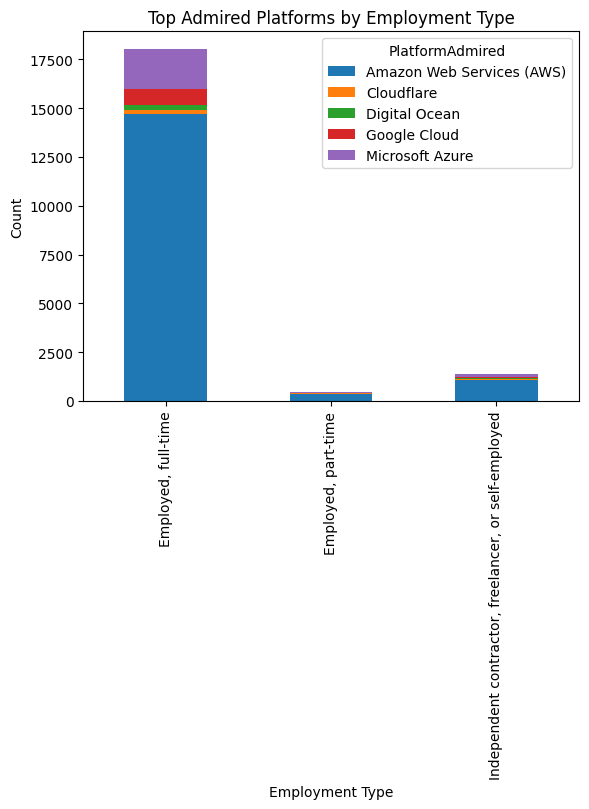

In [90]:
df_clean = df[["PlatformAdmired","Employment"]]
top_platform = df_clean["PlatformAdmired"].str.split(";").explode().str.strip().value_counts().head(5).index
top_employment = df_clean["Employment"].str.split(";").explode().str.strip().value_counts().head(5).index

employment_df = df_clean.assign(platform_admired = df_clean["PlatformAdmired"].str.split(";").explode("LanguageAdmired") )
employment_df = df_clean.assign(employment = df_clean["Employment"].str.split(";").explode("Employment") )

employment_df = employment_df[employment_df["Employment"].isin(top_employment) & employment_df["PlatformAdmired"].isin(top_platform)]

employment_df = employment_df.groupby(["Employment","PlatformAdmired"]).size().unstack()
employment_df.plot(kind="bar",stacked=True)
plt.title("Top Admired Platforms by Employment Type")
plt.ylabel("Count")
plt.xlabel("Employment Type")

Text(0, 0.5, 'Average Job Satisfaction Score')

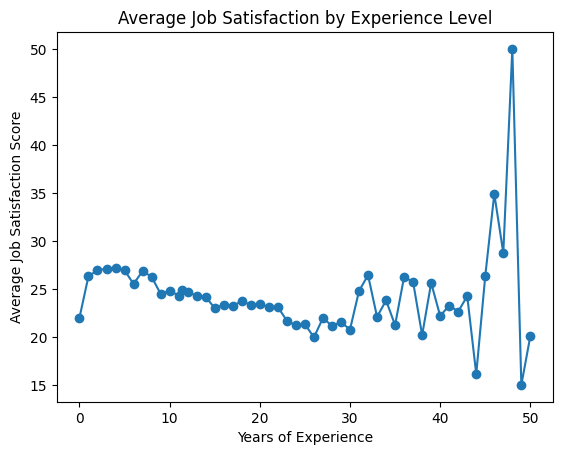

In [91]:
exp_satisfaction = df.groupby('WorkExp')['JobSatPoints_6'].mean().reset_index()

plt.plot(exp_satisfaction['WorkExp'], exp_satisfaction['JobSatPoints_6'], marker='o')
plt.title('Average Job Satisfaction by Experience Level')
plt.xlabel('Years of Experience')
plt.ylabel('Average Job Satisfaction Score')


Text(0, 0.5, 'Median Converted Compensation Yearly')

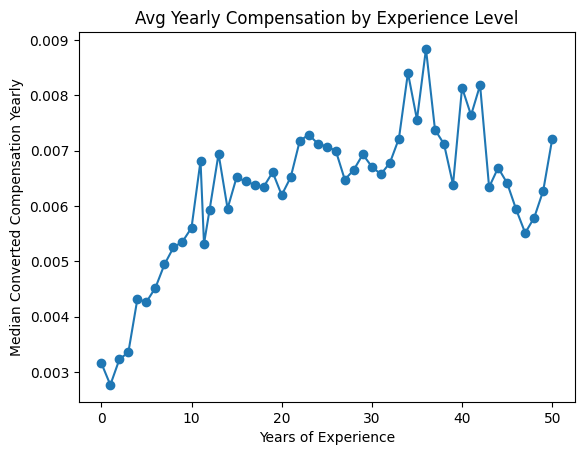

In [92]:
exp_comp  = df.groupby('WorkExp')['ConvertedCompYearly'].mean().reset_index()

plt.plot(exp_comp ['WorkExp'], exp_comp ['ConvertedCompYearly'], marker='o')
plt.title('Avg Yearly Compensation by Experience Level')
plt.xlabel('Years of Experience')
plt.ylabel('Median Converted Compensation Yearly')


Text(0, 0.5, 'Main Branch')

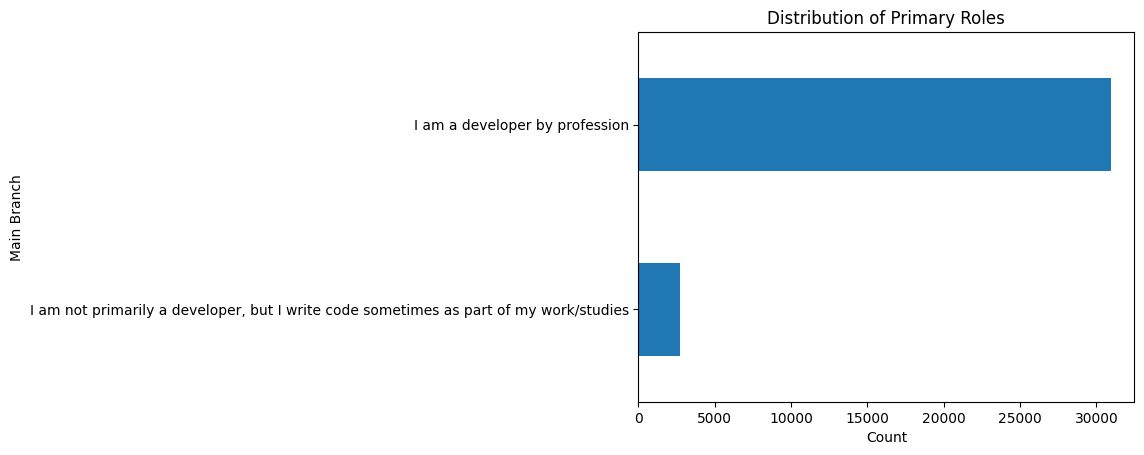

In [93]:
MainBranch = df["MainBranch"].value_counts(ascending=True)
MainBranch.plot(kind="barh")
plt.title('Distribution of Primary Roles')
plt.xlabel('Count')
plt.ylabel('Main Branch')

Text(0, 0.5, 'Count')

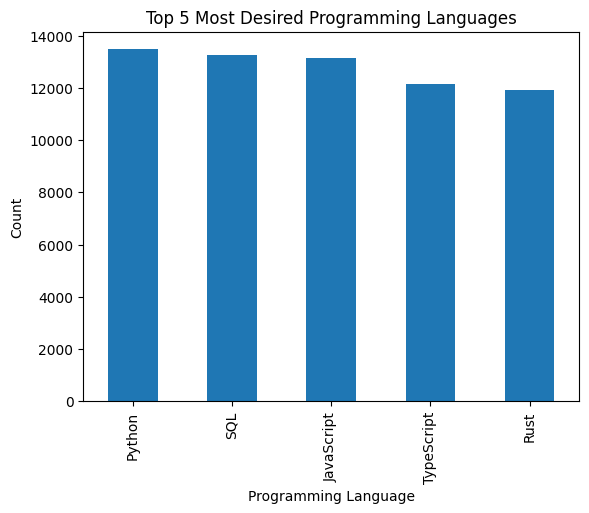

In [94]:
language = df["LanguageWantToWorkWith"].str.split(";").explode().str.strip()
language = language.value_counts().head(5)

language.plot(kind="bar")
plt.title('Top 5 Most Desired Programming Languages')
plt.xlabel('Programming Language')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

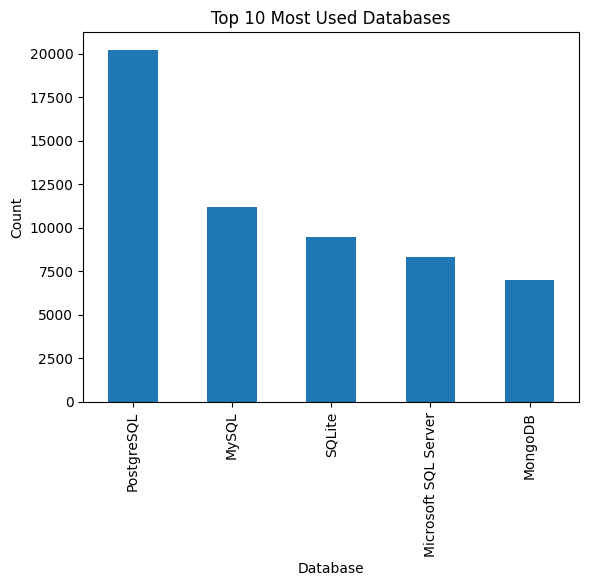

In [95]:
language = df["DatabaseHaveWorkedWith"].str.split(";").explode().str.strip()
language = language.value_counts().head(5)

language.plot(kind="bar")
plt.title('Top 10 Most Used Databases')
plt.xlabel('Database')
plt.ylabel('Count')

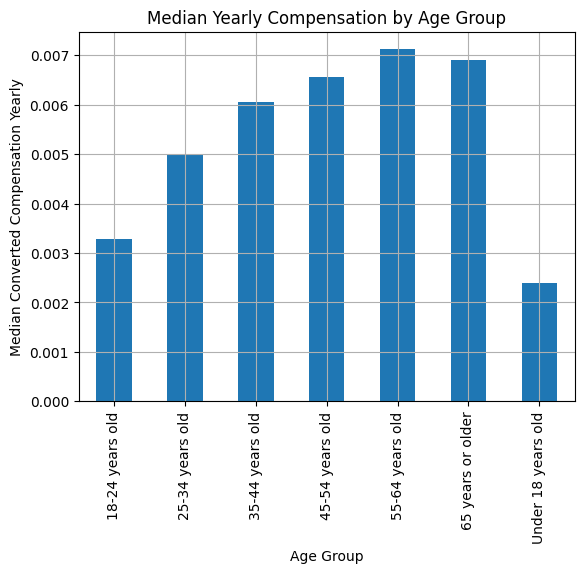

In [96]:
# Group by Age and calculate median compensation
age_comp = df.groupby('Age')['ConvertedCompYearly'].mean()

age_comp.plot(kind='bar')
plt.title('Median Yearly Compensation by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Median Converted Compensation Yearly')
plt.grid(True)
plt.show()

Text(0, 0.5, 'Number of Respondents')

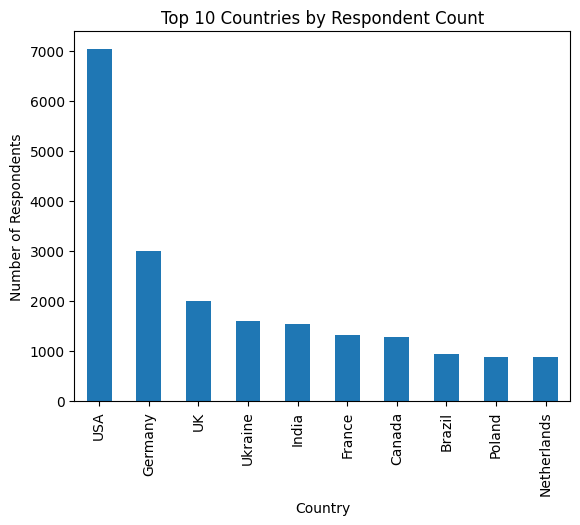

In [97]:
respondent_by_country = df.groupby("Country")["ResponseId"].count().sort_values(ascending=False).head(10)
respondent_by_country.plot(kind="bar")
plt.title('Top 10 Countries by Respondent Count')
plt.xlabel('Country')
plt.ylabel('Number of Respondents')



In [98]:
df.to_csv("survey_data_modified.csv", index=False)
print(df.shape)
df.to_sql('survey_data', conn, if_exists='replace', index=False)



(33668, 53)


33668